In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\sriji\Sentdex ML\K_Means.xlsx')

In [3]:
df.head()

,Name,Age,Income
0,Srijit,28,90000
1,Sourav,29,120000
2,Rohan,27,100000
3,Anisha,25,60000
4,Shariq,29,100000


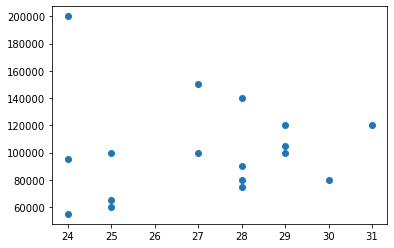

In [4]:
plt.scatter(df['Age'],df['Income'])

In [6]:
 km = KMeans(n_clusters=4)

In [7]:
km

KMeans(n_clusters=4)

In [8]:
y_predicted = km.fit_predict(df[['Age','Income']])

In [9]:
y_predicted

array([0, 3, 0, 2, 0, 2, 2, 2, 2, 3, 3, 0, 3, 1, 0, 2, 0])

In [10]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Srijit,28,90000,0
1,Sourav,29,120000,3
2,Rohan,27,100000,0
3,Anisha,25,60000,2
4,Shariq,29,100000,0


In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


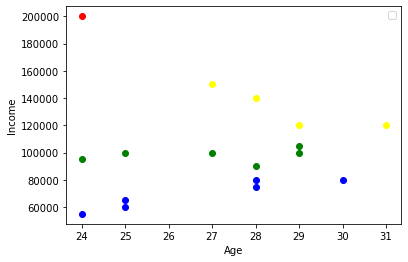

In [16]:
plt.scatter(df1['Age'],df1['Income'],color='green')
plt.scatter(df2['Age'],df2['Income'],color = 'red')
plt.scatter(df3['Age'],df3['Income'],color = 'blue')
plt.scatter(df4['Age'],df4['Income'],color = 'yellow')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Pre processing and usage of Scaler

In [19]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [20]:
df.head()

,Name,Age,Income,cluster
0,Srijit,0.571429,0.241379,0
1,Sourav,0.714286,0.448276,3
2,Rohan,0.428571,0.310345,0
3,Anisha,0.142857,0.034483,2
4,Shariq,0.714286,0.310345,0


In [24]:
kms = KMeans(n_clusters = 4)

In [25]:
y_predicted = kms.fit_predict(df[['Age','Income']])
y_predicted

array([2, 2, 0, 3, 2, 3, 3, 2, 2, 0, 0, 3, 2, 1, 3, 2, 2])

In [26]:
df['cluster'] = y_predicted
df

,Name,Age,Income,cluster
0,Srijit,0.571429,0.241379,2
1,Sourav,0.714286,0.448276,2
2,Rohan,0.428571,0.310345,0
3,Anisha,0.142857,0.034483,3
4,Shariq,0.714286,0.310345,2
5,Parna,0.000000,0.000000,3
6,Soumyajit,0.142857,0.068966,3
7,Udeepto,0.571429,0.172414,2
8,Suhotra,0.571429,0.137931,2
9,Ayan,0.428571,0.655172,0


In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]

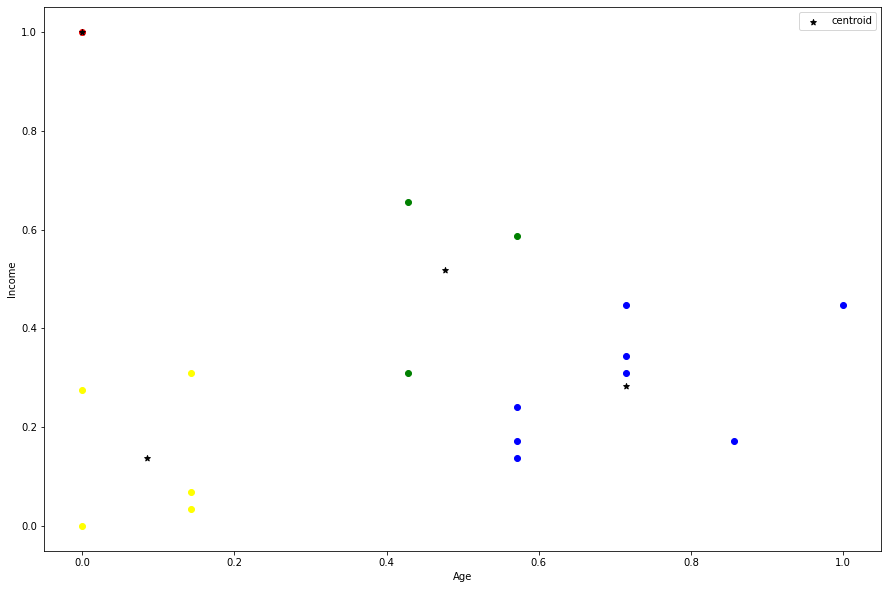

In [38]:
plt.figure(figsize = [15,10])
plt.scatter(df1['Age'],df1['Income'],color='green')
plt.scatter(df2['Age'],df2['Income'],color = 'red')
plt.scatter(df3['Age'],df3['Income'],color = 'blue')
plt.scatter(df4['Age'],df4['Income'],color = 'yellow')
plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],color = 'black',marker = '*',label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [30]:
kms.cluster_centers_

array([[0.47619048, 0.51724138],
       [0.        , 1.        ],
       [0.71428571, 0.28448276],
       [0.08571429, 0.13793103]])

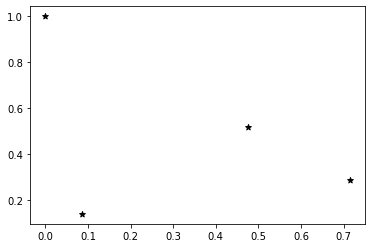

In [32]:
plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],color = 'black',marker = '*',label = 'centroid')

Elbow method and when scatter plot does not work

In [47]:
k_range = range(1,10)
sse = []
for k in k_range:
    kms = KMeans(n_clusters = k)
    kms.fit(df[['Age','Income']])
    sse.append(kms.inertia_)
    
sse    
       

C:\Users\sriji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2.638692575722321,
 1.3249172547626762,
 0.6994923880264458,
 0.463149365969138,
 0.2707758014026063,
 0.1898339359525024,
 0.12645700372895907,
 0.08251433748291241,
 0.05521852022616424]

In [40]:
#sse

[2.638692575722321,
 1.3249172547626762,
 0.6994923880264458,
 0.4576031125886736,
 0.2707758014026063,
 0.1898339359525024,
 0.12645700372895907,
 0.08251433748291241,
 0.05521852022616424]

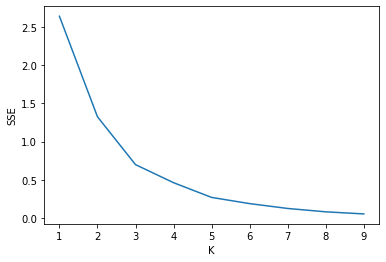

In [48]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_range,sse)